# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
%matplotlib inline

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


# 1. Is the distribution of body temperatures normal? 

In [4]:
# Your work here.
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


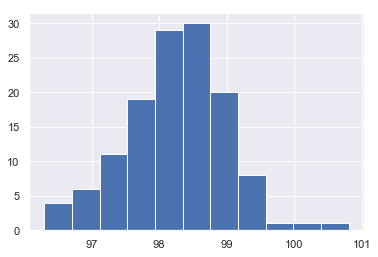

In [6]:
#First plot a histogram of the data


# Set default Seaborn style
sns.set()

n_data = len(df.temperature)
n_bins = int(np.sqrt(n_data))

# Plot histogram of versicolor petal lengths
_ = plt.hist(df.temperature, bins=n_bins)

# Show histogram
plt.show()


The left side of the histogram appears to follow a normal distribution, but the right side does not. Let's perform a normality test on the data.

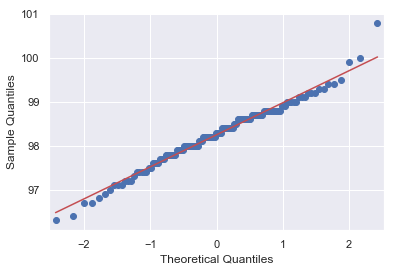

In [7]:
#QQ plot
#ref: https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

from statsmodels.graphics.gofplots import qqplot
qqplot(df.temperature, line='s')
plt.show()

In [8]:
#Using normal test - D’Agostino and Pearson’s
#Sample code from https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

k2, p = stats.normaltest(df.temperature)
alpha = 0.05
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0.258748
The null hypothesis cannot be rejected


In [9]:
#Shapiro normality test - More appropriate for sample sizes less than 1000
#ref: https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
from scipy.stats import shapiro
stat, p = shapiro(df.temperature)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.987, p=0.233
Sample looks Gaussian (fail to reject H0)


Based on the results of the normality tests above, we can presume the temperature distribution to be normal

# 2. Is the sample size large? Are the observations independent? 

### Since the sample size is greater than 30, it is a large sample size in light of the Central Limit Theorem. 

### Yes, the observation are independent.

# 3. Is the true population mean really 98.6 degrees F? 

First, try a bootstrap hypothesis test.


 

In [10]:
#Bootstrap replicate 1d
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [11]:
#Define bootstrap replicate function

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates


In [12]:
#Bootstrap test 

boot_sample = draw_bs_reps(df.temperature, np.mean, size=10000)

np.mean(boot_sample)

98.24851892307693

No, based on our bootstrap test, we obtain a lower mean body temperature.

### Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why? 

I would use a one-sample test, as we are taking a look at a single variable and we are not comparing it with any other variables. 

A two-sample test would be appropriate if we were to measure mean temperature under two different conditions, for example, 
comparision between male and female, or before and after a certain event.

### In this situation, is it appropriate to use the 𝑡 or 𝑧 statistic?

Even though we do not know the standard deviation of the population, we can use the Z statistic, as the sample size is large (greater than 30 samples).

In [13]:
#Mean of our sample distribution

sample_mean = np.mean(df.temperature)
print("Sample mean: " + str(sample_mean))

sample_std = np.std(df.temperature, ddof=1)
print("Sample Standard Deviation: " + str(sample_std))

#Z Score of 98.6 as mean
mean_temp = 98.6
z_score = (mean_temp - sample_mean)/sample_std
print("Z-score: " + str(z_score))

#p value
print("p value: " + str(stats.norm.cdf(z_score)))

Sample mean: 98.24923076923078
Sample Standard Deviation: 0.7331831580389454
Z-score: 0.4784196512470687
p value: 0.6838242251694571


The p value for a 98.6 F mean temperature is 0.684, which is far greater than our 0.05 threshold, so we do not reject the null hypothesis that 98.6F is the true population mean.

### Now try using the other test. How will the result be different? Why?

In [14]:
#Using t-statistic
#Ref: https://medium.com/@kangeugine/hypothesis-test-21795f788f7d
# one-tailed t-Test
t_score = stats.ttest_1samp(df.temperature, 98.6)
print(t_score)
alpha = 0.05
if (t_score[0] > 0) & (t_score[1]/2 < alpha):
    print("reject null hypothesis, mean is greater than 98.6")
else:
    print("accept null hypothesis")

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)
accept null hypothesis


The results should not be different, because the distribution using the t-test approaches the normal distribution when the number of samples is large.

# 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
### Which one is the correct one to use?
### What do you notice? What does this tell you about the difference in application of the 𝑡 and 𝑧 statistic? 

In [15]:
#Generate sample data of size 10

temp_sample = np.random.choice(df.temperature, size=10)

Since our sample size is small (less than 30 samples), we should now use the t-statistic, instead of the z statistic.

In [16]:
#Using t-statistic
#Ref: https://medium.com/@kangeugine/hypothesis-test-21795f788f7d
# one-tailed t-Test
t_score = stats.ttest_1samp(temp_sample, 98.6)
print(t_score)
alpha = 0.05
if (t_score[0] > 0) & (t_score[1]/2 < alpha):
    print("reject null hypothesis, mean is greater than 98.6")
else:
    print("accept null hypothesis")

Ttest_1sampResult(statistic=-1.1446979703749747, pvalue=0.2818629006076705)
accept null hypothesis


In [17]:
#Using z statistic

sample_mean = np.mean(temp_sample)
print("Sample mean: " + str(sample_mean))

sample_std = np.std(temp_sample, ddof=1)
print("Sample Standard Deviation: " + str(sample_std))

#Z Score of 98.6 as mean
mean_temp = 98.6
z_score = (mean_temp - sample_mean)/sample_std
print("Z-score: " + str(z_score))

#p value
print("p value: " + str(stats.norm.cdf(z_score)))

Sample mean: 98.39
Sample Standard Deviation: 0.5801340841181052
Z-score: 0.3619852819356868
p value: 0.6413184854963422


When we know perform the z statistic, we can see that the Z-score and p values are more extreme, even though the sample standard deviation is smaller. Still, we do not reject the null hypothesis using the z score, as the p value is quite high.

# 5. At what temperature should we consider someone's temperature to be "abnormal"?

### As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
### Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws

In [18]:
#Bootstrap confidence interval
bs_conf_int = np.percentile(boot_sample, [2.5, 97.5])
print("Confidence interval (F): " + str(bs_conf_int))

#Sample data margin of error
sem = np.std(boot_sample) / np.sqrt(len(boot_sample))

bs_margin = (1.96* sem)*100
print("Margin of error (%): " + str(bs_margin))

Confidence interval (F): [98.12230769 98.37615385]
Margin of error (%): 0.12623485912110888


In [19]:
#Z statistic confidence interval

pop_mean = 98.6

z_top_conf_int = 98.6 + 1.96*sem
z_bottom_conf_int = 98.6 - 1.96*sem

z_conf_int = [z_bottom_conf_int, z_top_conf_int]
print("Z statistic confidence interval: "+ str(z_conf_int))

z_margin = (z_conf_int[1]-z_conf_int[0])*100
print("Margin of error (%): " + str(z_margin))

Z statistic confidence interval: [98.59873765140878, 98.6012623485912]
Margin of error (%): 0.2524697182423097


In [20]:
#t stastistic confidence interval
#Using t critical value of 1.984 (~100 df)


t_top_conf_int = 98.6 + 1.984*sem
t_bottom_conf_int = 98.6 - 1.984*sem

t_conf_int = [t_bottom_conf_int, t_top_conf_int]
print("t statistic confidence interval: "+ str(t_conf_int))

t_margin = (t_conf_int[1]-t_conf_int[0])*100
print("Margin of error (%): " + str(t_margin))


t statistic confidence interval: [98.5987221940791, 98.60127780592089]
Margin of error (%): 0.25556118417853213


Based on our confidencen intervals, we can consider a temperature to be "abnormal" if it falls below 98.59F or if it rises above 98.6F

# 6. Is there a significant difference between males and females in normal temperature?
### What testing approach did you use and why?
### Write a story with your conclusion in the context of the original problem. 

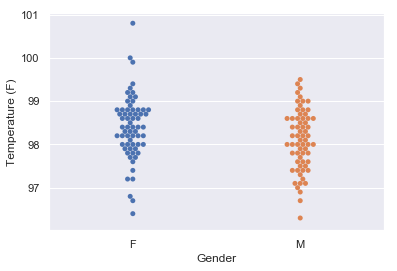

In [23]:
#First some EDA
#Swarmplot of male and female temperatures

# Swarm plot
_ = sns.swarmplot(x='gender',y='temperature', data=df)

# Label axes
_ = plt.xlabel('Gender')
_ = plt.ylabel('Temperature (F)')

# Show the plot
plt.show()

Based on the swarmplot, female temperatures appear to be more widespread in their range. However, in order to confirm if there is a significant difference in mean temperatures, I used permutation sampling in order to determine whether both male and female have similar distributions. Our null hypothesis is that there is no significant difference between them.

In [42]:
#Code to generate permutation sample
#Ref - "Statistical Thinking in Python 2" - Datacamp

#Definition of function which generates a permutation sample from two data sets

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    
    return perm_sample_1, perm_sample_2



In [46]:
#Function to generate permutation replicates
#Ref - "Statistical Thinking in Python 2" - Datacamp

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)
        
    return perm_replicates


In [43]:
#Function to compute difference of means
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

In [48]:
# Now we can compare the difference in the means using both empirical data and 
# permutation replicates

male_temp = df[df.gender=='M'].temperature

female_temp = df[df.gender=='F'].temperature


# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(male_temp.values,female_temp.values)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(male_temp.values, female_temp.values,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.9884


Based on the large p-value, we cannot reject our null hypothesis, therefore, we can conclude that there is no significant difference between male and female temperatures.